In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('class1_df.csv')

df_train, df_val = train_test_split(df, test_size=.2)
df_train.shape, df_val.shape

((49262, 4), (12316, 4))

In [2]:
from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
          

ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    x = x/255.
    return x
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('./galaxy-zoo-data/images_training_rev1/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_val, y_val = get_all_images(df_val)

100%|██████████| 12316/12316 [04:27<00:00, 46.02it/s]


In [3]:
#for i in range(3):
    #x = 110
    #y = 110
    #h = 25
    #w = 25
    #crop_img = original[x-h:x+h,y-w:y+w]
    #cv2.imshow("cropped", crop_img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

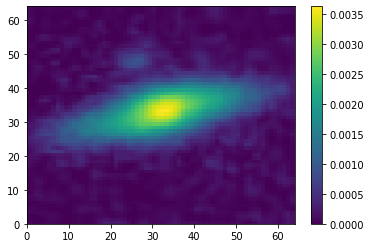

In [4]:
plt.pcolormesh(X_train[49261,:,:,0])
plt.colorbar()

In [5]:
X_train[1, :, :, 0]

array([[4.99807766e-05, 9.99615532e-05, 6.53594771e-05, ...,
        1.42252980e-04, 1.46097655e-04, 8.45828527e-05],
       [2.30680507e-05, 3.07574010e-05, 5.76701269e-05, ...,
        8.45828527e-05, 9.99615532e-05, 9.99615532e-05],
       [1.53787005e-05, 0.00000000e+00, 2.30680507e-05, ...,
        7.68935025e-05, 5.38254517e-05, 1.15340254e-04],
       ...,
       [9.22722030e-05, 3.07574010e-05, 1.53787005e-05, ...,
        3.46020761e-05, 3.46020761e-05, 4.99807766e-05],
       [4.99807766e-05, 1.15340254e-05, 2.69127259e-05, ...,
        2.30680507e-05, 0.00000000e+00, 6.92041522e-05],
       [4.61361015e-05, 4.22914264e-05, 3.07574010e-05, ...,
        1.15340254e-04, 6.15148020e-05, 3.84467512e-05]])

In [6]:
X_train.shape, y_train.shape

((49262, 64, 64, 3), (49262, 3))

In [7]:
y_val.shape

(12316, 3)

Tutorial CNN : https://victorzhou.com/blog/keras-cnn-tutorial/

In [28]:
# Normalize the images.
#train_images = (X_train / 255) - 0.5
#val_images = (X_val / 255) - 0.5

#print(train_images.shape) 
#print(val_images.shape)  

In [20]:
# ignore Warning
import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Conv2D, MaxPooling2D
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.applications import MobileNet
from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor='val_accuracy', patience=10)]

seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
#tf.random.set_seed(seed)

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu')) #82% avec 16
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))
#model.add(MaxPooling2D(pool_size=(4,4)))
#model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

  #Conv2D(num_filters, filter_size, input_shape=(64, 64, 3)),
  #MaxPooling2D(pool_size=pool_size),
  #Flatten(),
  #Dense(3, activation='sigmoid'),
#])



In [21]:
import keras
# Set Optimizer
#opt = adam(lr=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=keras.optimizers.Adamax(),
  metrics=['accuracy'],
)

In [22]:
# ignore Warning
import warnings
warnings.filterwarnings("ignore")

history = model.fit(
  X_train,
  y_train,
  epochs=100,
  validation_data=(X_val, y_val),
  batch_size=X_train.shape[1], 
  callbacks=callbacks
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 49262 samples, validate on 12316 samples
Epoch 1/100





49262/49262 [==============================] - 105s 2ms/step - loss: 0.7910 - acc: 0.5639 - val_loss: 0.7853 - val_acc: 0.5672
Epoch 2/100
49262/49262 [==============================] - 99s 2ms/step - loss: 0.7790 - acc: 0.6055 - val_loss: 0.7759 - val_acc: 0.6127
Epoch 3/100
49262/49262 [==============================] - 98s 2ms/step - loss: 0.7657 - acc: 0.6517 - val_loss: 0.7591 - val_acc: 0.6824
Epoch 4/100
49262/49262 [==============================] - 100s 2ms/step - loss: 0.7557 - acc: 0.6776 - val_loss: 0.7569 - val_acc: 0.6860
Epoch 5/100
49262/49262 [==============================] - 100s 2ms/step - loss: 0.7458 - acc: 0.7015 - val_loss: 0.7408 - val_acc: 0.7220
Epoch 6/100
49262/49262 [==============================] - 96s 2ms/step - loss: 0.7383 - acc: 0.7198 - val_loss: 0.7343 - val_acc: 0.7384
Epoch 7/100
49262

49262/49262 [==============================] - 99s 2ms/step - loss: 0.6850 - acc: 0.7982 - val_loss: 0.6847 - val_acc: 0.8026
Epoch 45/100
49262/49262 [==============================] - 97s 2ms/step - loss: 0.6843 - acc: 0.7995 - val_loss: 0.6809 - val_acc: 0.8100
Epoch 46/100
49262/49262 [==============================] - 96s 2ms/step - loss: 0.6840 - acc: 0.8000 - val_loss: 0.6828 - val_acc: 0.8063
Epoch 47/100
49262/49262 [==============================] - 97s 2ms/step - loss: 0.6836 - acc: 0.7987 - val_loss: 0.6806 - val_acc: 0.8098
Epoch 48/100
49262/49262 [==============================] - 97s 2ms/step - loss: 0.6833 - acc: 0.7993 - val_loss: 0.6818 - val_acc: 0.8123
Epoch 49/100
49262/49262 [==============================] - 98s 2ms/step - loss: 0.6828 - acc: 0.7999 - val_loss: 0.6812 - val_acc: 0.8097
Epoch 50/100
49262/49262 [==============================] - 97s 2ms/step - loss: 0.6828 - acc: 0.8013 - val_loss: 0.6848 - val_acc: 0.8058
Epoch 51/100
49262/49262 [==============

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 8)         584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 4707      
Total params: 5,515
Trainable params: 5,515
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Predict.
predictions = model.predict(X_val)
# Print our model's predictions.
print("predictions: " + str(predictions[:1]))

# Check our predictions against the ground truths.
print(y_val[:1]) 

predictions: [[0.5717658 0.4046546 0.0235796]]
[[0.548188 0.416942 0.03487 ]]


In [26]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.6723496696127432
Val accuracy: 0.8225885028187119


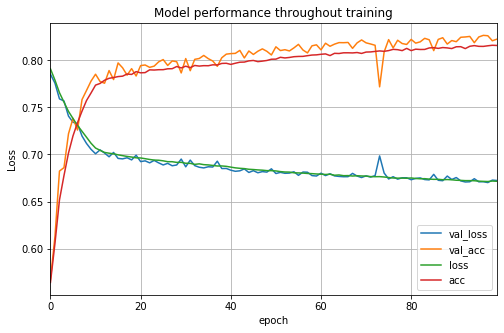

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Score

Avec ce modèle:  
model = Sequential()  
model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu')) #82% avec 16  
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Flatten())  
model.add(Dense(3, activation='softmax'))

model.compile(
  loss='categorical_crossentropy',
  optimizer=keras.optimizers.Adamax(),
  metrics=['accuracy'],
)

history = model.fit(
  X_train,
  y_train,
  epochs=100,
  validation_data=(X_val, y_val),
  batch_size=X_train.shape[1], 
  callbacks=callbacks
)

Accuracy = 82,25 %  
Prediction/correct value: predictions: [[0.5717658 0.4046546 0.0235796]]/correct_value[[0.548188 0.416942 0.03487 ]]